# Power failure: why small sample size undermines the reliability of neuroscience

I've recently read an [article](https://www.nature.com/articles/nrn3475) about low power in neuroscience research and its influence on effect sizes.

In this simulation I wanted to study the following key point from the article:

>We discuss the consequences of such low statistical power, which include overestimates of effect size and low reproducibility of results.

### Are effect sizes overestimated?

#### Params

In [1]:
# abs effect 0.05; relative = 0.1
p1 = 0.5
p2 = 0.55

In [2]:
from statsmodels.stats import power
ssize = power.zt_ind_solve_power(effect_size=0.1, alpha=0.05, power=0.8, ratio=1)
print(f'Required sample size for such set of params is {ssize}')

Required sample size for such set of params is 1569.7721019023288


#### Let's use the same sample size but lower the effect, so that the power is not enough

In [3]:
# 0.52/0.5 = 0.04
p3 = 0.52

In [4]:
pwr = power.zt_ind_solve_power(effect_size=0.04, alpha=0.05, nobs1=1570, ratio=1)
print(f'For such sample and effect sizes the power becomes {pwr}')

For such sample and effect sizes the power becomes 0.20169718715921628


#### required sample size for effect real effect 0.55 - 0.50, but we use it when trying to detect 0.52-0.5 effect, getting an underpowered study

In [16]:
import numpy as np
from scipy.stats import binom
from statsmodels.stats.proportion import proportions_ztest
from tqdm import tqdm

In [55]:
from numpy.random import Generator, PCG64
np_rand_gen = Generator(PCG64(92))

nsim = 10000
samp_size = 1570

ef = []
pvs = []

for i in tqdm(range(nsim)):

    x = binom.rvs(n=samp_size, size=1, p=p1, random_state=np_rand_gen)
    y = binom.rvs(n=samp_size, size=1, p=p3, random_state=np_rand_gen)
    
    success_cnts = np.concatenate([x, y])
    total_cnts = np.array([samp_size, samp_size])

    ef.append((np.mean(y) - np.mean(x))/samp_size)
    pvs.append(proportions_ztest(count=success_cnts, nobs=total_cnts)[1])

100%|██████████| 10000/10000 [00:00<00:00, 10858.99it/s]


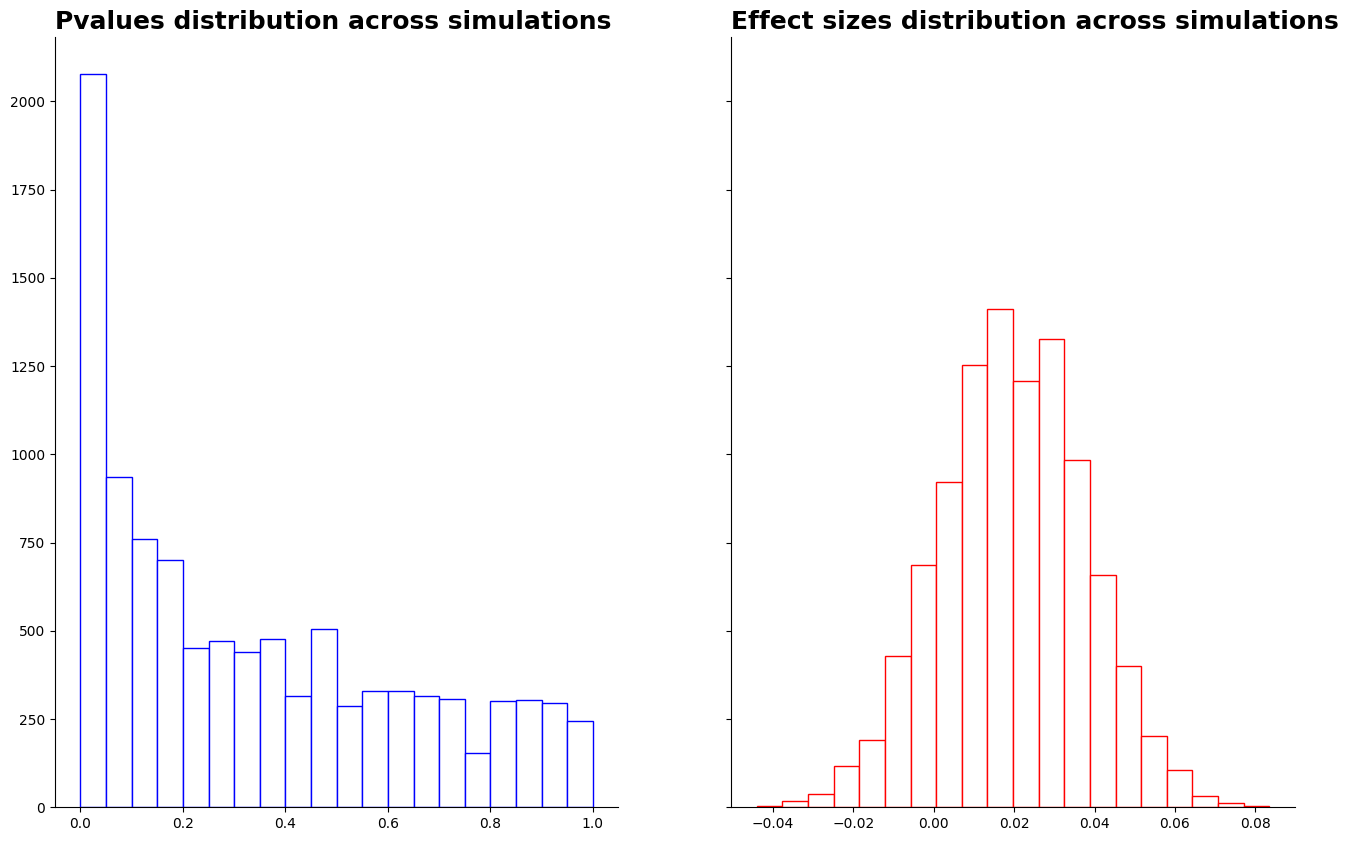

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), sharey=True)

ax[0].hist(pvs, edgecolor='blue', facecolor='white', bins=20)
ax[1].hist(ef, edgecolor='red', facecolor='white', bins=20);

ax[0].set_title('Pvalues distribution across simulations', size=18, loc='left', fontweight='bold')
ax[1].set_title('Effect sizes distribution across simulations', size=18, loc='left', fontweight='bold');

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

### We find a significant effect ~20% of times (which corresponds to expected power), but the effect is inflated. real effect is 2% and mean effect in case of stat significance is 4%



In [58]:
pvs = np.array(pvs)
ef = np.array(ef)

print(f'Estimated power is {np.mean(pvs < 0.05)}')
print(f'Mean effect when pvalue < 0.05 is {np.mean(ef[pvs < 0.05])}')

Estimated power is 0.2078
Mean effect when pvalue < 0.05 is 0.04407992741673461
